# Statistische Kalibration Time-To-Digital Converter

## Verteilungen

----

#### Prof. Christian Münker, 14. Juni 2017

In [1]:
from __future__ import print_function, division
#show plot in notebook instead of separate windows:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt, pi
import scipy
import scipy.stats

#plt.style.use('seaborn-whitegrid')
plt.style.use('classic')#('seaborn-dark')
plt.rcParams['figure.figsize'] = (12.0, 5.0) # Plotgröße in Inch
#print(plt.style.available) # alle Matplotlib styles

In [2]:
# globale Variablen
N = 140      # Anzahl der Verzögerungselemente (Bins)
L = 2**14    # Anzahl der Messungen (= Versuche)
T_max = 2e-9 # maximale Messdauer einer Verzögerungskette

T_bin = T_max / N # durchschnittliche Verzögerung eines Elements
p_i = 1./N   # mittlere Wahrscheinlichkeit das Bin i zu treffen


## Zufallszahlengenerator ##
Ein Generator soll zunächst gleichverteilte Zufallszahlen im Bereich 1 ... 140 erzeugen. Die Auftretenswahrscheinlichkeit $P_i$ der einzelnen Zahlen $i$ soll mit $L$ Versuchen mit einem Histogramm mit $N = 140$ Bins geschätzt werden (der Erwartungswert ist hier einfach $E<Y_i> = L/N$). Dann soll die Wahrscheinlichkeit bestimmt werden, dass

a) ein Bin mit der Häufigkeit $H_i = E \pm 10 \%$ getroffen wird und

b) *alle* Bins mit der Häufigkeit $H_i = E \pm 10 \%$ getroffen werden (also keine kleineren oder größeren Häufigkeiten auftreten)

c) welches Sigma hat die Kalibration in s und mm in Abhängigkeit von $L$ bei $N = 110$?
 

d) inhomogenen Delays ?

e) INL bei inhomogenen Delays? Nach Kalibration? 

f) "5 s" Fehler

g) Vergleichbar mit "Soft Error"

Erwartungswert E =	136.53 	(aus Stichprobe: 137.27) Counts
Std.abweichung Sigma =	11.64 Counts

0.0050% - 99.9950% Quantile 	= 94 - 184 Counts
Minimum - Maximum (Stichprobe)	= 101 - 163 Counts
Delta (E - Min) bzw. (Max - E) 	= 35.53  Counts	(Delta / Sigma = 3.054)
n_sum = 16472


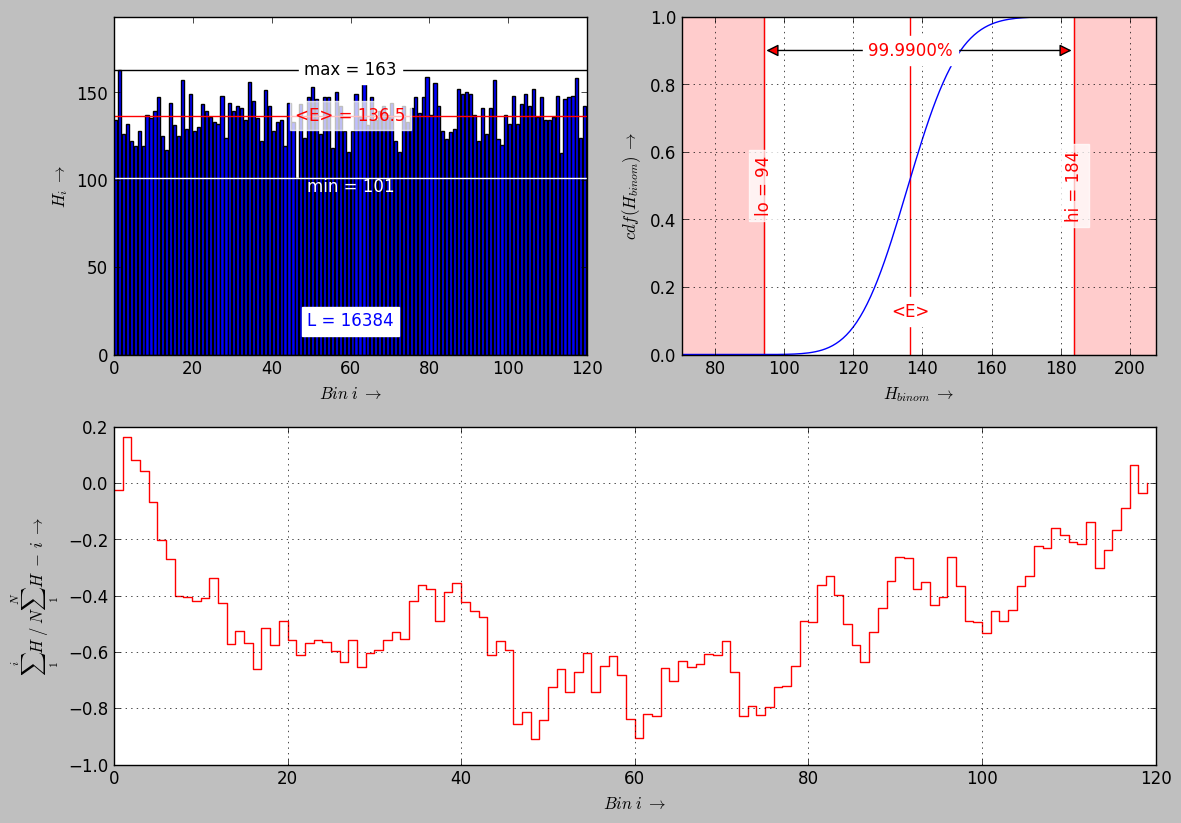

In [3]:
#T = 2.e-9 # System Clock
L = 2**14  # Anzahl der Einzelmessungen
N = 120     # Anzahl der Bins, in die die Messungen fallen
p = 1./N    # Wahrscheinlichkeit, dass das zu messende Zeitintervall in ein bestimmtes Bin fällt

# Binomialverteilung mit p = 1/N und L Bernoulli-Versuchen (= Einzelmessungen) -> "Hits" für 1 Bin
binom = scipy.stats.binom(n = L, p = p)
size = N#int(L/N) # Stichprobengröße für Binomialverteilung
# Stichprobe mit size Versuchsreihen einer Binomialverteilung für einzelnes Bin / eine Versuchsreihe für N Bins:
x_binom = binom.rvs(size=size)
mean = binom.mean() # Erwartungswert
std = binom.std()   # Standardabweichung 
n_sum = np.sum(x_binom) # Anzahl der Einzelmessungen, zurückgerechnet aus der Summe der Stichproben
# Quantile: Berechne die Bins bin_lo bzw. bin_hi, unterhalb derer der Anteil quant_lo bzw. quant_hi = 1 - quant_lo liegen
perc = 0.9999
quant_lo = (1 - perc)/2.; quant_hi = 1 - quant_lo # unteres bzw. oberes Quantil
bin_lo = binom.ppf(quant_lo);  bin_hi = binom.ppf(quant_hi) # untere bzw. obere Grenzen
#
N_bins = np.arange(2 * int(mean)) # array mit "Hits" = Anzahl der Messungen in einem Bin von 0 bis 2*Erwartungswert
cdf = binom.cdf(N_bins) # kumulierte Wahrscheinlichkeitsdichte
#print("Binomialverteilung:", x_binom)
print("Erwartungswert E =\t{0:.5g} \t(aus Stichprobe: {1:.5g}) Counts"
      .format(mean, np.sum(x_binom)/N))
print("Std.abweichung Sigma =\t{0:.4g} Counts\n".format(std))
print("{0:.4%} - {1:.4%} Quantile \t= {2:g} - {3:g} Counts"
      .format(quant_lo, quant_hi, bin_lo, bin_hi))
print("Minimum - Maximum (Stichprobe)\t= {0:d} - {1:d} Counts".format(min(x_binom), max(x_binom)))
Delta_max  = max(mean - min(x_binom), max(x_binom) - mean)
print("Delta (E - Min) bzw. (Max - E) \t= {0:.4g}  Counts\t(Delta / Sigma = {1:.4g})"
      .format(Delta_max, Delta_max/std))
print("n_sum = {0:g}".format(n_sum))
fig1 = plt.figure(1, figsize =(12,12))
ax1 = fig1.add_subplot(321) 
ax1.bar(range(N), x_binom)
ax1.axhline(y=mean, color='r')
ax1.text(N/2., mean, '<E> = {0:.4g}'.format(mean), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,0.75))
ax1.axhline(y=min(x_binom), color='w')
ax1.text(N/2., min(x_binom), 'min = {0}'.format(min(x_binom)), color='w', ha='center', va='top')
ax1.axhline(y=max(x_binom), color='k')
ax1.text(N/2., max(x_binom), 'max = {0}'.format(max(x_binom)), color='k', ha='center', va='center', 
         backgroundcolor='w')
ax1.text(N/2., 0.1 * max(x_binom), 'L = {0}'.format(L), color='b', backgroundcolor='w', ha='center')
ax1.set_xlabel(r"$Bin\;i\; \rightarrow$"); ax1.set_ylabel(r"$H_{i}\; \rightarrow$")
ax1.set_ylim(0, max(bin_hi, max(x_binom)) * 1.05)
ax2 = fig1.add_subplot(322)
ax2.set_xlim(bin_lo * 0.75, bin_hi + bin_lo*0.25)
ax2.axvline(x=bin_lo, color = 'r'); ax2.axvline(x=mean, color = 'r'); 
ax2.axvline(x=bin_hi, color = 'r')
ax2.axvspan(0, bin_lo, facecolor='r', alpha=.2); ax2.axvspan(bin_hi, L, facecolor='r', alpha=.2)
ax2.text(mean, 0.1, '<E>', ha='center', va='bottom', color='r', backgroundcolor='w') # rotation=90,
ax2.text(bin_lo, 0.5, 'lo = {0:g}'.format(bin_lo), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,0.75), rotation=90)
ax2.text(bin_hi, 0.5, 'hi = {0:g}'.format(bin_hi), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,0.75), rotation=90)
    # double-headed arrow for period length using annotate command with empty text:
ax2.annotate('', (bin_lo, 0.9),(bin_hi, 0.9), xycoords='data', ha="center", va="center", size=18,
        arrowprops=dict(arrowstyle="<|-|>", facecolor = 'red', edgecolor='black' ))
ax2.text(mean, 0.9, '{0:.4%}'.format(perc), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,1))
ax2.set_xlabel(r"$H_{binom}\;\rightarrow$"); ax2.set_ylabel(r"$cdf(H_{binom})\; \rightarrow$")
ax2.grid(True)
ax2.plot(N_bins, cdf)

#hist, bin_hist = np.histogram(x_binom, bins = N) 
hist_acc = np.cumsum(x_binom) # Accumulate histogram values and ...
hist_acc = hist_acc / hist_acc[-1] * N # scale in such a way that the last accumulated bin = N
ax3 = fig1.add_subplot(312); ax3.grid(True)
#ax3.step(range(N), hist_acc, 'b', where="post", label="Accumulated Histogram")
ax3.step(range(N), hist_acc - range(1,N+1), 'r', where="post", label="Delta")
ax3.set_xlabel(r"$Bin\;i\; \rightarrow$"); 
ax3.set_ylabel(r"$\sum^i_{1} H \; / \; N \sum^N_{1} H \; -\;  i\; \rightarrow$")
fig1.tight_layout()
plt.show()

Durch Akkumulieren des Histogramms erhält man die Quantisierungskennline, Zeit über Bin:

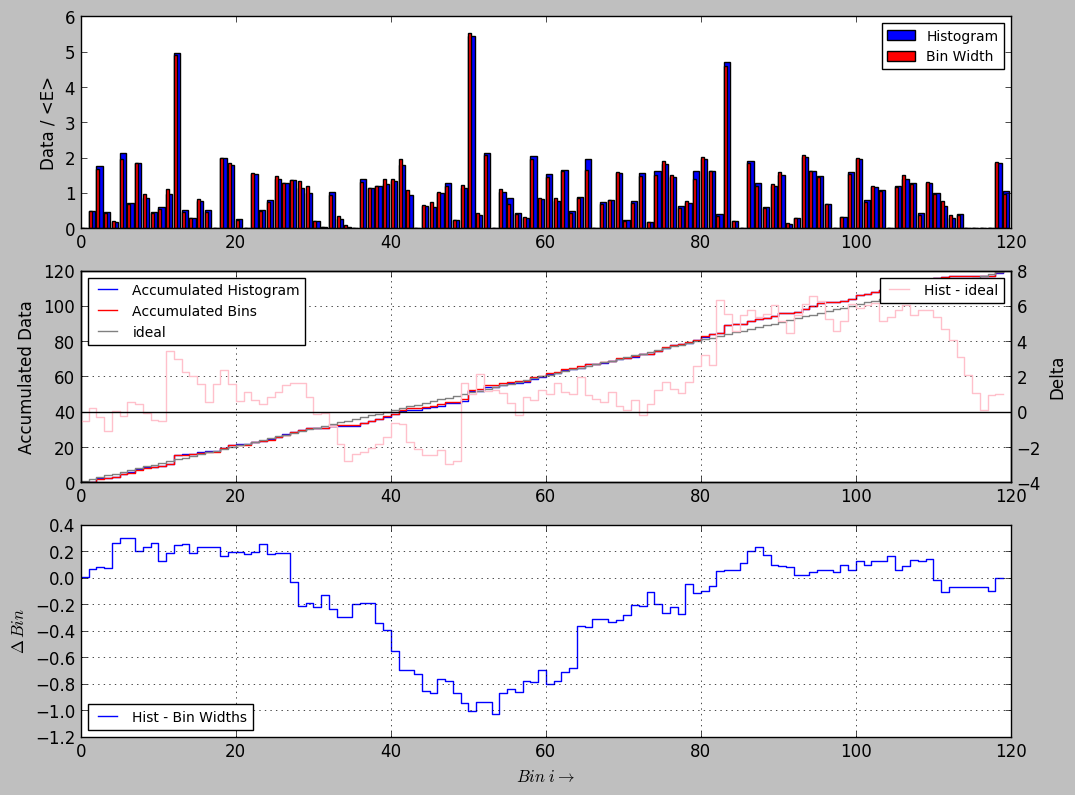

In [4]:
# N = 120 # number of bins
T0 = 2e-9 # clock period
norm = scipy.stats.uniform() # uniform distribution
x_norm = norm.rvs(size=L) * N # L samples in the range 0 ... N
bin_widths = np.clip(np.random.rand(N) - 0.1, 0, 1000) * 3 # N bins with random / zero width
uw_bins = [[12, 6.3], [50,7.1], [83, 5.9]] # einige ultrawide bins
for b in uw_bins:
    bin_widths[b[0]] = b[1]
bin_edges = np.cumsum(bin_widths) # calculate bin edges by accumulating the bins ...
bin_edges = np.insert(bin_edges, 0, 0) #  ... add left most edge = 0 (-> N+1 edges) and .. 
bin_edges = bin_edges * N / bin_edges[-1] # .... scale all bins so that the right-most edge = N
E_hist = L/N # Expectation value histogram
E_bins = np.mean(bin_widths) # Expectation value bin width (uniform distribution)
#print(bin_widths)
#print(bin_edges)
# histogram() returns (values, edges). len(edges) = len(hist) + 1. Bin _edges_ are specified:
hist, bin_hist = np.histogram(x_norm, bins = bin_edges) 
hist_acc = np.cumsum(hist) # Accumulate histogram values and ...
hist_acc = hist_acc / hist_acc[-1] * N # scale in such a way that the last accumulated bin = N
#print(len(hist), hist[-1])
#print(max(x_norm))

fig3 = plt.figure(3, figsize=(12.0, 9.0))
ax11 =  fig3.add_subplot(311)
#ax12 = ax11.twinx()
ax11.bar(range(N), hist/E_hist, label="Histogram") # 
ax11.bar(range(N), bin_widths/E_bins, width = 0.4, color="red", label="Bin Width")
ax11.set_ylabel("Data / <E>")
#ax12.set_ylabel("Bin Width")
ax11.legend(loc='best', fontsize=10)
#
ax21 = fig3.add_subplot(312); ax21.grid(True)
ax21.step(range(N), hist_acc, 'b', where="post", label="Accumulated Histogram")
ax21.step(range(N), bin_edges[1:], 'r', where="post", label="Accumulated Bins")
ax21.step(range(N), range(N), color='0.5', label="ideal")
ax21.set_ylabel("Accumulated Data")
ax22 = ax21.twinx()
ax22.step(range(N), hist_acc - range(N), color="pink", label="Hist - ideal")
ax22.axhline(y=0, color='k')
ax22.set_ylabel("Delta")
ax22.legend(loc='best', fontsize=10)
ax21.legend(loc='best', fontsize=10)
#
ax31 = fig3.add_subplot(313); ax31.grid(True)
ax31.step(range(N), hist_acc - bin_edges[1:], label="Hist - Bin Widths")
#ax31.step(range(N), hist_acc - range(N), label="Hist - ideal")
ax31.set_xlabel(r"$Bin\;i \rightarrow$")
ax31.set_ylabel(r"$\Delta \, Bin$")
ax31.legend(loc='best', fontsize=10);


In [5]:
#np.histogram?